In [2]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, '1D Random walk with n=100')

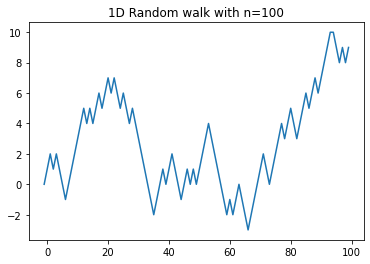

In [40]:
# 1D Random walk

UP_PROB = 0.6
DOWN_PROB = 0.4

UP_LIMIT = 10
DOWN_LIMIT = -np.inf

MAX_MOVES = 100

start = 0
rand_probs = np.random.random(MAX_MOVES)
positions = [start]

for i in range(MAX_MOVES):
    down_move = up_move = 0

    if rand_probs[i] < DOWN_PROB:
        # moving down
        down_move += 1
    else:
        # mvoing up
        up_move += 1

    new_pos = positions[-1] - down_move + up_move
    if new_pos > UP_LIMIT:
        new_pos = UP_LIMIT
    elif new_pos < DOWN_LIMIT:
        new_pos = DOWN_LIMIT

    positions.append(new_pos)


plt.plot(np.arange(-1, MAX_MOVES), positions)

plt.title('1D Random walk with n=100')

Text(0.5, 1.0, '2D Random walk with n=1000000')

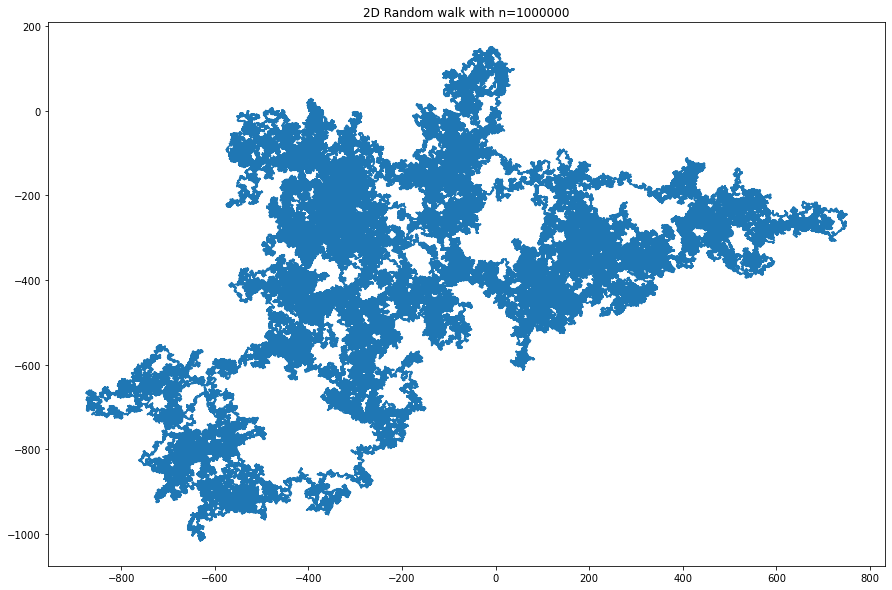

In [43]:
# 2D random walk

STEP_SIZE = 1
UP_PROB = [0.5, 0.5]
DOWN_PROB = [0.5, 0.5]

UP_LIMIT = [np.inf, np.inf]
DOWN_LIMIT = [-np.inf, -np.inf]

MAX_MOVES = 1_000_000

start = np.array([0, 0])
rand_probs = np.random.random((MAX_MOVES, 2))
positions = np.zeros((MAX_MOVES, 2))
positions[0] = start

for i in range(1, MAX_MOVES):
    # x position
    down_move = up_move = 0

    if rand_probs[i][0] < DOWN_PROB[0]:
        # moving down
        down_move += STEP_SIZE
    else:
        # mvoing up
        up_move += STEP_SIZE

    new_x_pos = positions[i - 1][0] - down_move + up_move
    if new_x_pos > UP_LIMIT[0]:
        new_x_pos = UP_LIMIT[0]
    elif new_x_pos < DOWN_LIMIT[0]:
        new_x_pos = DOWN_LIMIT[0]

    # y position
    down_move = up_move = 0
    if rand_probs[i][1] < DOWN_PROB[1]:
        # moving down
        down_move += STEP_SIZE
    else:
        # mvoing up
        up_move += STEP_SIZE

    new_y_pos = positions[i - 1][1] - down_move + up_move
    if new_y_pos > UP_LIMIT[1]:
        new_y_pos = UP_LIMIT[1]
    elif new_y_pos < DOWN_LIMIT[1]:
        new_y_pos = DOWN_LIMIT[1]

    positions[i] = [new_x_pos, new_y_pos]


plt.figure(figsize=(15, 10))
plt.plot(positions[:, 0], positions[:, 1])
plt.title(f"2D Random walk with n={MAX_MOVES}")


Text(0.5, 1.0, '2D Random walk n=2000000 with showing frequency of presence in positions')

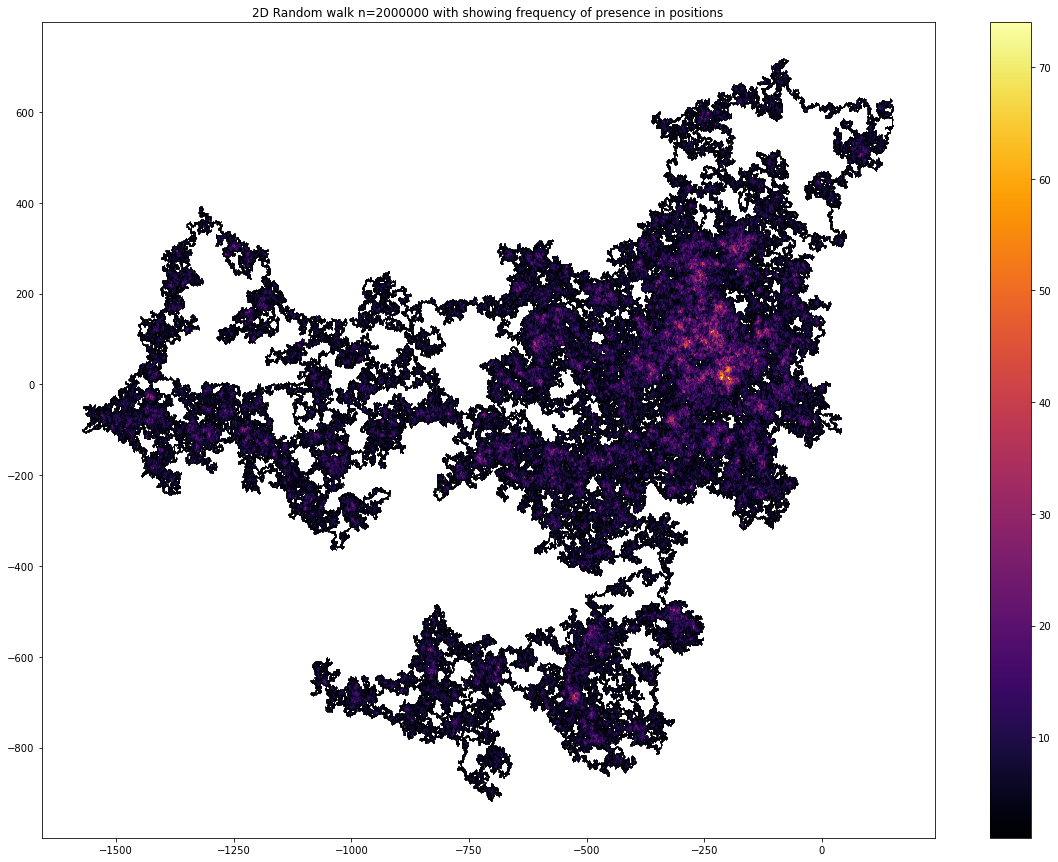

In [3]:
# 2D random walk with considering and colloring frequency of positions

UP_PROB = [0.5, 0.5]
DOWN_PROB = [0.5, 0.5]

UP_LIMIT = [np.inf, np.inf]
DOWN_LIMIT = [-np.inf, -np.inf]

STEP_SIZE = 1

MAX_MOVES = 2_000_000

start = np.array([0, 0])
rand_probs = np.random.random((MAX_MOVES, 2))

positions = np.zeros((MAX_MOVES, 2))
positions_freq = {}

positions[0] = start
positions_freq[(start[0], start[1])] = 1


for i in range(1, MAX_MOVES):
    # x position
    down_move = up_move = 0

    if rand_probs[i][0] < DOWN_PROB[0]:
        # moving down
        down_move += STEP_SIZE
    else:
        # mvoing up
        up_move += STEP_SIZE

    new_x_pos = positions[i - 1][0] - down_move + up_move
    if new_x_pos > UP_LIMIT[0]:
        new_x_pos = UP_LIMIT[0]
    elif new_x_pos < DOWN_LIMIT[0]:
        new_x_pos = DOWN_LIMIT[0]

    # y position
    down_move = up_move = 0
    if rand_probs[i][1] < DOWN_PROB[1]:
        # moving down
        down_move += STEP_SIZE
    else:
        # mvoing up
        up_move += STEP_SIZE

    new_y_pos = positions[i - 1][1] - down_move + up_move
    if new_y_pos > UP_LIMIT[1]:
        new_y_pos = UP_LIMIT[1]
    elif new_y_pos < DOWN_LIMIT[1]:
        new_y_pos = DOWN_LIMIT[1]

    if (new_x_pos, new_y_pos) not in positions_freq:
        positions_freq[(new_x_pos, new_y_pos)] = 0

    positions_freq[(new_x_pos, new_y_pos)] += 1
    positions[i] = np.array([new_x_pos, new_y_pos])

positions_freq_mtx = np.zeros((MAX_MOVES, 3))

for i, pos in enumerate(positions):
    positions_freq_mtx[i] = np.array([pos[0], pos[1], positions_freq[(pos[0], pos[1])]])

plt.figure(figsize=(20, 15))
plt.scatter(
    positions_freq_mtx[:, 0],
    positions_freq_mtx[:, 1],
    c=positions_freq_mtx[:, 2],
    cmap="inferno",
    marker="_",
    s=1,
    vmin=np.min(positions_freq_mtx[:, 2]),
    vmax=np.max(positions_freq_mtx[:, 2]),
)
plt.colorbar()
plt.title(f"2D Random walk n={MAX_MOVES} with showing frequency of presence in positions")


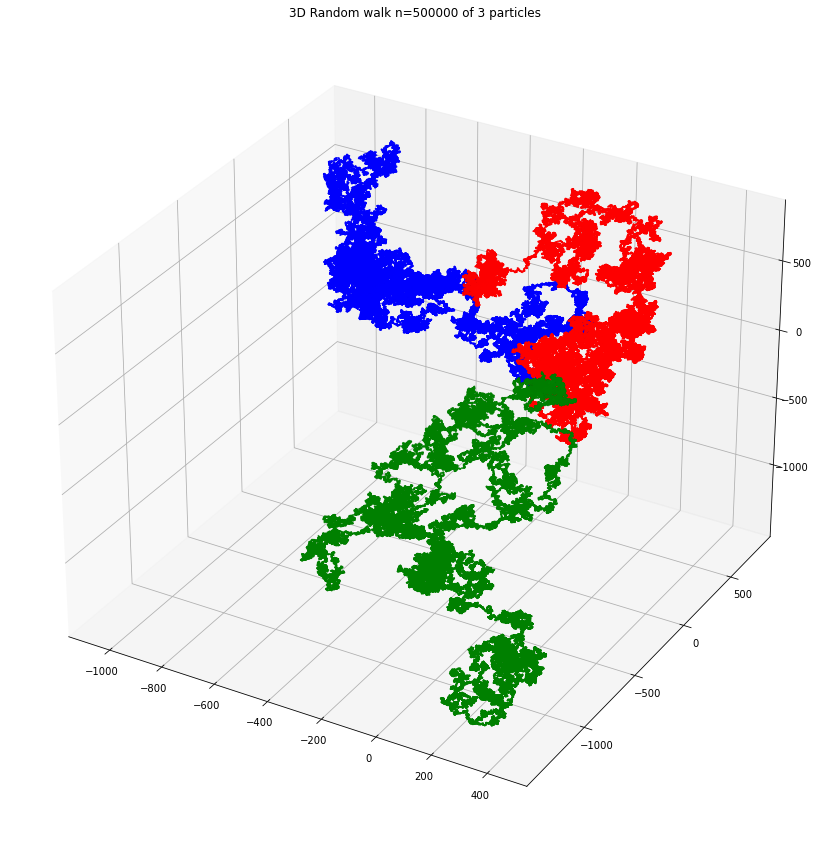

In [42]:
# 3D Random walk with 3 different particles

UP_PROBS = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.6], [0.5, 0.5, 0.4]]
DOWN_PROBS = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.4], [0.5, 0.5, 0.6]]

UP_LIMITS = [
    [np.inf, np.inf, np.inf],
    [np.inf, np.inf, np.inf],
    [np.inf, np.inf, np.inf],
]
DOWN_LIMITS = [
    [-np.inf, -np.inf, -np.inf],
    [-np.inf, -np.inf, -np.inf],
    [-np.inf, -np.inf, -np.inf],
]

STEP_SIZE = 1

MAX_MOVES = 500_000
N_PARTICLES = 3

start = np.array([0, 0, 0])
rand_probs = np.random.random((N_PARTICLES, MAX_MOVES, 3))

positions = np.zeros((N_PARTICLES, MAX_MOVES, 3))

for i in range(N_PARTICLES):
    positions[i][0] = start


for i in range(1, MAX_MOVES):
    for j in range(N_PARTICLES):
        # x position
        x_down_move = x_up_move = 0

        if rand_probs[j][i][0] < DOWN_PROBS[j][0]:
            # moving down
            x_down_move += STEP_SIZE
        else:
            # mvoing up
            x_up_move += STEP_SIZE

        new_x_pos = positions[j][i - 1][0] - x_down_move + x_up_move
        if new_x_pos > UP_LIMITS[j][0]:
            new_x_pos = UP_LIMITS[j][0]
        elif new_x_pos < DOWN_LIMITS[j][0]:
            new_x_pos = DOWN_LIMITS[j][0]

        # y position
        y_down_move = y_up_move = 0
        if rand_probs[j][i][1] < DOWN_PROBS[j][1]:
            # moving down
            y_down_move += STEP_SIZE
        else:
            # mvoing up
            y_up_move += STEP_SIZE

        new_y_pos = positions[j][i - 1][1] - y_down_move + y_up_move
        if new_y_pos > UP_LIMITS[j][1]:
            new_y_pos = UP_LIMITS[j][1]
        elif new_y_pos < DOWN_LIMITS[j][1]:
            new_y_pos = DOWN_LIMITS[j][1]

        # z position
        z_down_move = z_up_move = 0
        if rand_probs[j][i][2] < DOWN_PROBS[j][2]:
            # moving down
            z_down_move += STEP_SIZE
        else:
            # mvoing up
            z_up_move += STEP_SIZE

        new_z_pos = positions[j][i - 1][1] - z_down_move + z_up_move
        if new_z_pos > UP_LIMITS[j][2]:
            new_z_pos = UP_LIMITS[j][2]
        elif new_z_pos < DOWN_LIMITS[j][2]:
            new_z_pos = DOWN_LIMITS[j][2]

        positions[j][i] = np.array([new_x_pos, new_y_pos, new_z_pos])

PARTICLES_COLORS = ["red", "blue", "green"]
plt.figure(figsize=(20, 15))
ax_3d = plt.axes(projection="3d")
for i in range(N_PARTICLES):
    ax_3d.scatter(
        positions[i, :, 0],
        positions[i, :, 1],
        positions[i, :, 2],
        c=PARTICLES_COLORS[i],
        s=1,
        marker=".",
    )
    plt.title(f"3D Random walk n={MAX_MOVES} of {N_PARTICLES} particles")
